
=== Reverted CategoricalNB ===
Accuracy: 0.6143
              precision    recall  f1-score   support

           0       0.63      0.92      0.74       456
           1       0.78      0.80      0.79       539
           2       0.74      0.32      0.44       209
           3       0.67      0.08      0.15        24
           4       0.55      0.15      0.24        39
           5       0.52      0.56      0.54       674
           6       0.52      0.60      0.56       596
           7       1.00      0.35      0.52        17
           8       0.62      0.18      0.28        28
           9       0.75      0.57      0.64       152
          10       1.00      0.08      0.15        38
          11       0.65      0.35      0.45       228

    accuracy                           0.61      3000
   macro avg       0.70      0.41      0.46      3000
weighted avg       0.63      0.61      0.60      3000



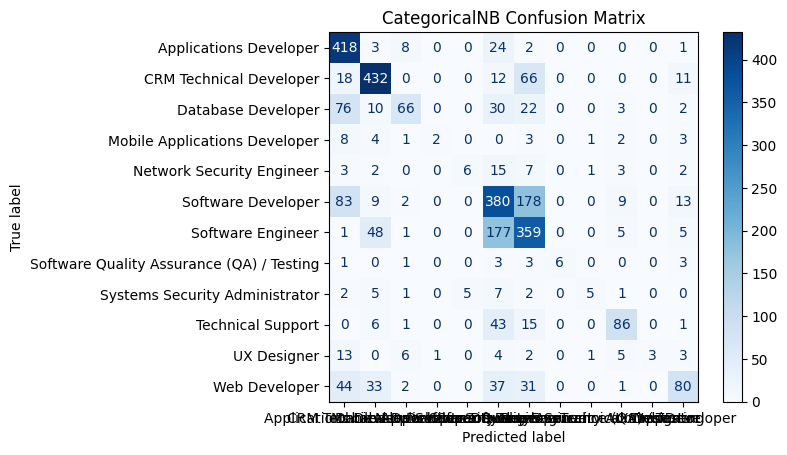

c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 


=== Enhanced MultinomialNB ===
Accuracy: 0.4713
              precision    recall  f1-score   support

           0       0.40      0.88      0.54       456
           1       0.56      0.74      0.64       539
           2       0.90      0.22      0.35       209
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        39
           5       0.48      0.26      0.34       674
           6       0.45      0.51      0.48       596
           7       1.00      0.41      0.58        17
           8       0.33      0.07      0.12        28
           9       0.38      0.36      0.37       152
          10       0.50      0.18      0.27        38
          11       1.00      0.08      0.15       228

    accuracy                           0.47      3000
   macro avg       0.50      0.31      0.32      3000
weighted avg       0.53      0.47      0.43      3000



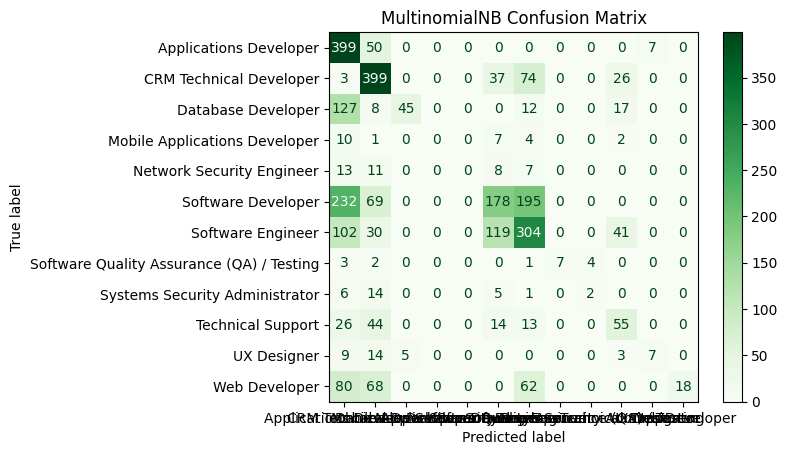

C:\Users\vbhav\AppData\Local\Temp\ipykernel_25048\3410371376.py:140: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_binary = X_train[binary_cols].replace({"yes": 1, "no": 0})
C:\Users\vbhav\AppData\Local\Temp\ipykernel_25048\3410371376.py:141: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_binary = X_test[binary_cols].replace({"yes": 1, "no": 0})
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



=== Improved BernoulliNB ===
Accuracy: 0.3910
              precision    recall  f1-score   support

           0       0.46      0.68      0.55       456
           1       0.43      0.75      0.54       539
           2       0.22      0.37      0.27       209
           3       0.07      0.12      0.09        24
           4       0.09      0.23      0.12        39
           5       0.55      0.11      0.18       674
           6       0.49      0.25      0.33       596
           7       0.35      0.41      0.38        17
           8       0.33      0.07      0.12        28
           9       0.36      0.59      0.44       152
          10       0.29      0.29      0.29        38
          11       0.31      0.19      0.24       228

    accuracy                           0.39      3000
   macro avg       0.33      0.34      0.30      3000
weighted avg       0.43      0.39      0.36      3000



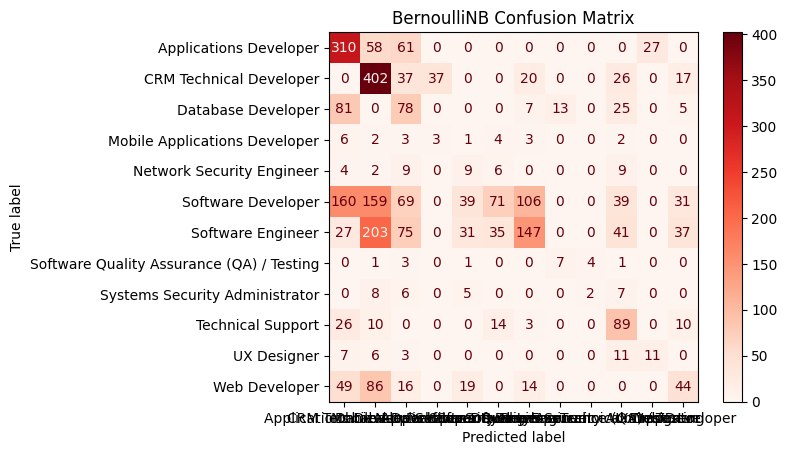

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import (
    MinMaxScaler, 
    LabelEncoder, 
    OrdinalEncoder, 
    KBinsDiscretizer
)
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.utils.validation import check_array
from scipy.sparse import hstack

# Load and preprocess data
df = pd.read_csv('cleaned_data.csv')
# Feature engineering
df['memory_work_ethic'] = df['memory capability score'].astype(str) + "_" + df['hard/smart worker']
df['num_keywords'] = df['keywords'].apply(lambda x: len(x.split(', ')))

# Feature lists
numeric_features = [
    "Logical quotient rating", 
    "hackathons", 
    "coding skills rating",
    "public speaking points",
    "memory capability score"
]

binary_cols = [
    "self-learning capability?", 
    "Extra-courses did", 
    "worked in teams ever?", 
    "Introvert"
]

categorical_cols = [
    "keywords", "workshops", "reading and writing skills",
    "certifications", "Interested subjects", "interested career area ",
    "Type of company want to settle in?", "Interested Type of Books",
    "Management or Technical", "hard/smart worker", "memory capability score"
]


# Convert scores to numeric
score_map = {"poor": 1, "medium": 2, "excellent": 3}
df["memory capability score"] = df["memory capability score"].str.lower().map(score_map)
df["public speaking points"] = df["public speaking points"].astype(int)

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["SuggestedJobRole"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("SuggestedJobRole", axis=1), 
    y, 
    test_size=0.3, 
    random_state=42
)

# Encode categorical features using LabelEncoder
X_train_cat = X_train[categorical_cols].apply(LabelEncoder().fit_transform)
X_test_cat = X_test[categorical_cols].apply(lambda col: LabelEncoder().fit(col).transform(col))

# Handle potential missing categories in test set by filling with -1
X_test_cat = X_test_cat.where(pd.notnull(X_test_cat), -1)

# Train and evaluate
catnb = CategoricalNB(min_categories=10)
catnb.fit(X_train_cat, y_train)
y_pred = catnb.predict(X_test_cat)

print("\n=== Reverted CategoricalNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('CategoricalNB Confusion Matrix')
plt.show()


# ========== Enhanced MultinomialNB ==========
# Text processing
tfidf = TfidfVectorizer(
    tokenizer=lambda x: x.split(", "),
    ngram_range=(1, 2),
    max_features=1000,
    sublinear_tf=True
)

# Feature scaling
scaler = MinMaxScaler()

# Prepare features
X_train_keywords = tfidf.fit_transform(X_train['keywords'])
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_train_multi = hstack([X_train_keywords, X_train_numeric])

X_test_keywords = tfidf.transform(X_test['keywords'])
X_test_numeric = scaler.transform(X_test[numeric_features])
X_test_multi = hstack([X_test_keywords, X_test_numeric])

# Train and evaluate
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_multi, y_train)
y_pred_multi = mnb.predict(X_test_multi)

print("\n=== Enhanced MultinomialNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_multi):.4f}")
print(classification_report(y_test, y_pred_multi))

# Confusion Matrix
cm_multi = confusion_matrix(y_test, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=label_encoder.classes_)
disp_multi.plot(cmap='Greens')
plt.title('MultinomialNB Confusion Matrix')
plt.show()

# ========== Improved BernoulliNB ==========
# Binary features
vectorizer_bern = CountVectorizer(
    tokenizer=lambda x: x.split(", "),
    binary=True,
    max_features=500,
    ngram_range=(1, 2)
)

X_train_binary = X_train[binary_cols].replace({"yes": 1, "no": 0})
X_test_binary = X_test[binary_cols].replace({"yes": 1, "no": 0})

# Combine features
X_train_bern = hstack([
    vectorizer_bern.fit_transform(X_train['keywords']),
    X_train_binary,
    X_train[['num_keywords']]
])

X_test_bern = hstack([
    vectorizer_bern.transform(X_test['keywords']),
    X_test_binary,
    X_test[['num_keywords']]
])

# Train and evaluate
bnb = BernoulliNB(alpha=0.25)
bnb.fit(X_train_bern, y_train)
y_pred_bern = bnb.predict(X_test_bern)

print("\n=== Improved BernoulliNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bern):.4f}")
print(classification_report(y_test, y_pred_bern))

# Confusion Matrix
cm_bern = confusion_matrix(y_test, y_pred_bern)
disp_bern = ConfusionMatrixDisplay(confusion_matrix=cm_bern, display_labels=label_encoder.classes_)
disp_bern.plot(cmap='Reds')
plt.title('BernoulliNB Confusion Matrix')
plt.show()

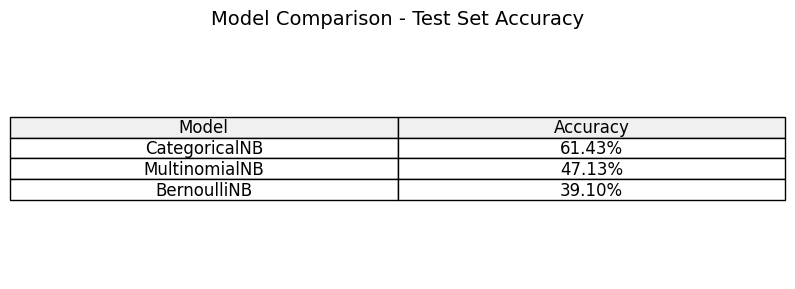

In [3]:
results = {
    'Model': ['CategoricalNB', 'MultinomialNB', 'BernoulliNB'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_multi),
        accuracy_score(y_test, y_pred_bern)
    ]
}

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
results_df['Accuracy'] = results_df['Accuracy'].map('{:.2%}'.format)

plt.figure(figsize=(8, 3))
plt.axis('off')
plt.title("Model Comparison - Test Set Accuracy", fontsize=14, pad=10)
table = plt.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#f0f0f0']*2)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.tight_layout()
plt.show()

